https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset/notebooks

In [1]:
from google.colab import drive
drive.mount('/g')

Drive already mounted at /g; to attempt to forcibly remount, call drive.mount("/g", force_remount=True).


In [2]:
import pandas as pd

raw_df = pd.read_csv('/g/My Drive/Tensorflow AI/Dataset_spine.csv')

In [3]:
raw_df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [4]:
raw_df.drop(columns='Unnamed: 13',inplace=True)
col_name = ['pelvic_incidnece','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis',
           'pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope','Class_att']
raw_df.columns = col_name

raw_df.head(10)

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


In [5]:
raw_df.describe()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [6]:
df= raw_df.copy()

In [7]:
import numpy as np

In [8]:
df['class'] = df.Class_att.apply(lambda x: 0 if x=='Abnormal' else 1)


In [9]:
df.head()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,0


In [27]:
df['class'].value_counts()

0    210
1    100
Name: class, dtype: int64

In [11]:
df.drop(columns=['Class_att'], inplace=True)

In [12]:
df.head()

,pelvic_incidnece,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,0


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df['class'].values


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [30]:
forest = RandomForestClassifier()

In [31]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

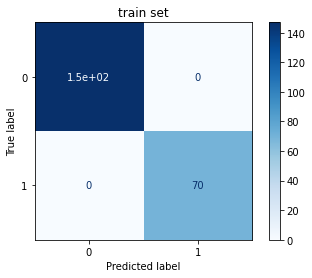

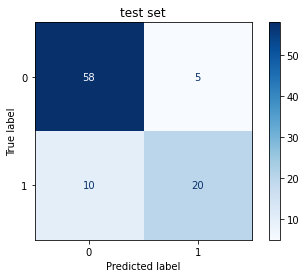

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest, X_train, y_train,                                 
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('train set')
plt.show()

plot_confusion_matrix(forest, X_test, y_test,                                 
                                 cmap=plt.cm.Blues,
                                 normalize=None)
plt.title('test set')
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

y_test_pred = forest.predict(X_test)
accuracy_score(y_test, y_test_pred)



0.8387096774193549

In [19]:
y_train_pred = forest.predict(X_train)
accuracy_score(y_train, y_train_pred)

1.0

In [34]:
estimator = forest.estimators_[0]
estimator.tree_.max_depth

11

In [21]:
acc = []

# max depth를 바꾸면서 테스트해보자
for i in range(1, 15):
  forest = RandomForestClassifier(max_depth=i)
  forest.fit(X_train,y_train)

  # train acc
  y_train_pred = forest.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_pred)

  # test acc
  y_test_pred = forest.predict(X_test)
  test_acc=accuracy_score(y_test, y_test_pred)
  acc.append({'max_depth':i, 'train_acc':train_acc, 'test_acc':test_acc})

  print('max_depth: {}, train acc: {}, test acc: {}'.format(i, train_acc, test_acc))

max_depth: 1, train acc: 0.7788018433179723, test acc: 0.6881720430107527
max_depth: 2, train acc: 0.8663594470046083, test acc: 0.8172043010752689
max_depth: 3, train acc: 0.9308755760368663, test acc: 0.8494623655913979
max_depth: 4, train acc: 0.967741935483871, test acc: 0.8387096774193549
max_depth: 5, train acc: 0.9907834101382489, test acc: 0.8602150537634409
max_depth: 6, train acc: 0.9953917050691244, test acc: 0.8602150537634409
max_depth: 7, train acc: 1.0, test acc: 0.8494623655913979
max_depth: 8, train acc: 1.0, test acc: 0.8064516129032258
max_depth: 9, train acc: 1.0, test acc: 0.8172043010752689
max_depth: 10, train acc: 1.0, test acc: 0.8602150537634409
max_depth: 11, train acc: 1.0, test acc: 0.8709677419354839
max_depth: 12, train acc: 1.0, test acc: 0.8279569892473119
max_depth: 13, train acc: 1.0, test acc: 0.8602150537634409
max_depth: 14, train acc: 1.0, test acc: 0.8387096774193549


In [22]:
acc_df = pd.DataFrame(acc)

In [23]:
acc_df

,max_depth,train_acc,test_acc
0,1,0.778802,0.688172
1,2,0.866359,0.817204
2,3,0.930876,0.849462
3,4,0.967742,0.838710
4,5,0.990783,0.860215
5,6,0.995392,0.860215
6,7,1.000000,0.849462
7,8,1.000000,0.806452
8,9,1.000000,0.817204
9,10,1.000000,0.860215


In [24]:
acc_df.set_index('max_depth', inplace=True)

In [25]:
acc_df

,train_acc,test_acc
max_depth,,
1,0.778802,0.688172
2,0.866359,0.817204
3,0.930876,0.849462
4,0.967742,0.838710
5,0.990783,0.860215
6,0.995392,0.860215
7,1.000000,0.849462
8,1.000000,0.806452
9,1.000000,0.817204


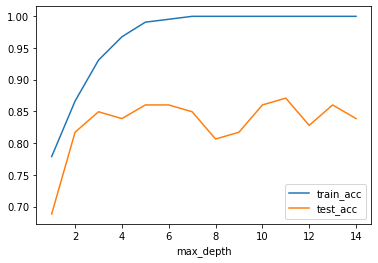

In [26]:
acc_df.plot()